In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
titanic_labeled_data = pd.read_csv('data/train.csv')
titanic_unlabeled_data = pd.read_csv('data/test.csv')

In [18]:
titanic_labeled_data.info()
titanic_unlabeled_data.info()
titanic_labeled_data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

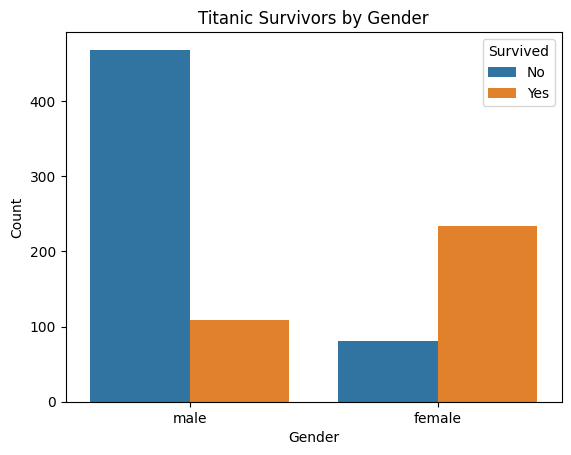

In [11]:
# graph to show the number of survivors by gender
sns.countplot(data=titanic_labeled_data, x="Sex", hue="Survived")
plt.title("Titanic Survivors by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

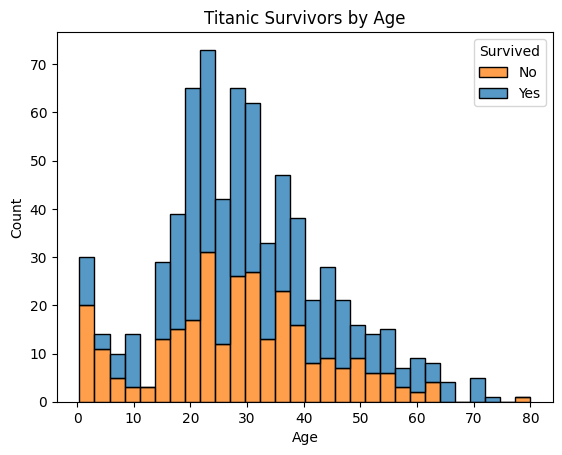

In [12]:
# graph to show the number of survivors by age
# Histogram with survival split
sns.histplot(data=titanic_labeled_data, x="Age", hue="Survived", bins=30, kde=False, multiple="stack")
plt.title("Titanic Survivors by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


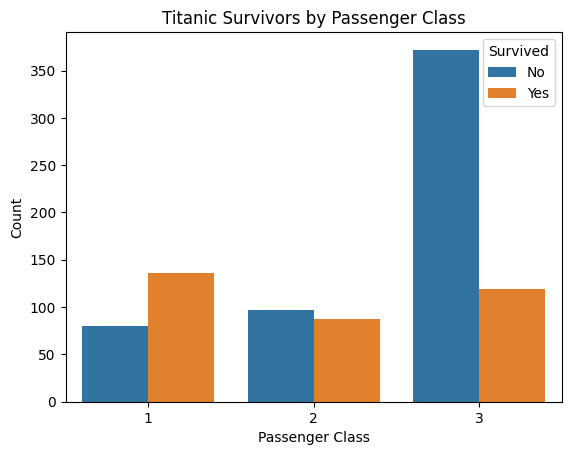

In [13]:
sns.countplot(data=titanic_labeled_data, x="Pclass", hue="Survived")
plt.title("Titanic Survivors by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

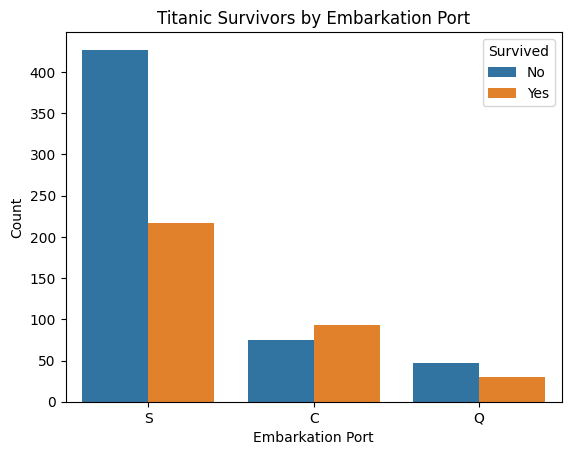

In [15]:
sns.countplot(data=titanic_labeled_data, x="Embarked", hue="Survived")
plt.title("Titanic Survivors by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

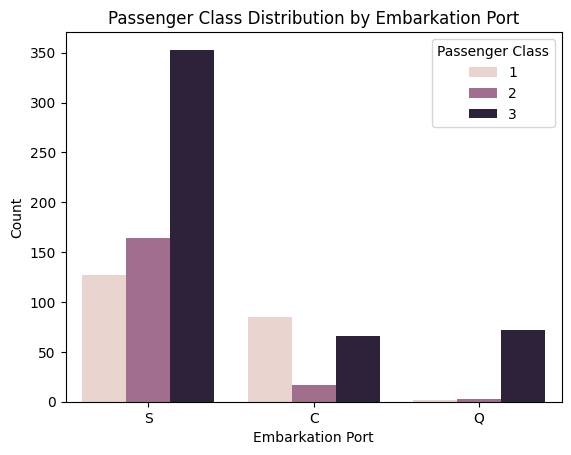

In [17]:
sns.countplot(data=titanic_labeled_data, x="Embarked", hue="Pclass")
plt.title("Passenger Class Distribution by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.legend(title="Passenger Class")
plt.show()

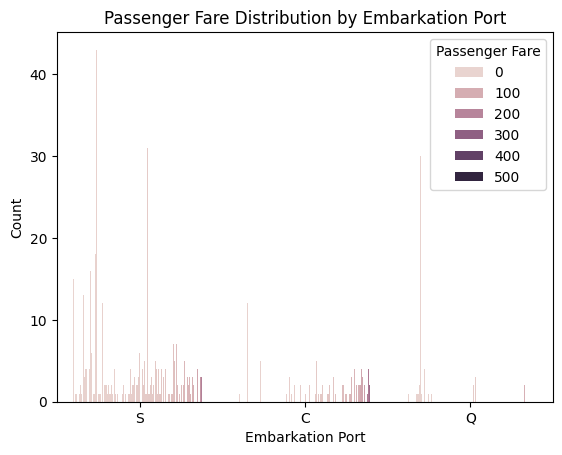

In [19]:
sns.countplot(data=titanic_labeled_data, x="Embarked", hue="Fare")
plt.title("Passenger Fare Distribution by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.legend(title="Passenger Fare")
plt.show()

In [21]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline
# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer
# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer
# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder
# Import train_test_split from sklearn's model_selection module

In [ ]:
# Define different categorical features 
categorical_features = ["Sex", "Embarked"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [27]:
# Age
age_feature = ["Age"]

# Crearte numeric transformer Pipeline
age_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median"
    ("imputer", SimpleImputer(strategy="median"))])

# Embarked
embarked_feature = ["Embarked"]
# Create categorical transformer Pipeline
embarked_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Constant" value "S" because the fare is high and the it's of 1st class and we only have 2 missing values
    ("imputer", SimpleImputer(strategy="constant", fill_value="S"))])


In [26]:
len(set(titanic_labeled_data["Ticket"]))
# i don't see importance of filling missing values in cabin so i will drop it
# the same for tickets as big number of people have unique ticket 

681

In [29]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_features),
        ("embarked", embarked_transformer, embarked_feature),
        ("age", age_transformer, age_feature)])